  # Diagnosing the Model

  Evaluate the accuracy and health of the logistic regression model by creating a confusion matrix and classification report to describe the performance of the models.

In [1]:
from pathlib import Path
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import pandas as pd

  ### Create, train, and execute the LR model

In [2]:
# Prep data
data = Path('../Resources/diabetes.csv')
df = pd.read_csv(data)

y = df["Outcome"]
X = df.drop(columns="Outcome")

# Split data into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)

# Create and train LR model
classifier = LogisticRegression(solver='lbfgs',
                                max_iter=200,
                                random_state=1)
classifier.fit(X_train, y_train)

# Execute LR predictions
predictions = classifier.predict(X_test)
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
results.head()

,Prediction,Actual
0,0,0
1,1,1
2,0,0
3,1,1
4,0,0


  ### Confusion Matrix

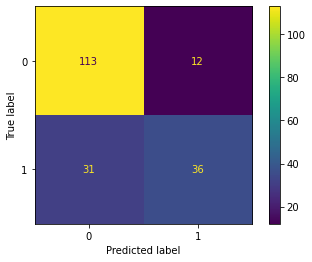

In [7]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_plot = confusion_matrix(y_test, predictions)
ConfusionMatrixDisplay(cm_plot).plot()

  ### Classification Report

In [4]:
# Create a classification report
target_names = ["No Diabetes", "Diabetes"]
print(classification_report(y_test, predictions, target_names=target_names))

              precision    recall  f1-score   support

 No Diabetes       0.78      0.90      0.84       125
    Diabetes       0.75      0.54      0.63        67

    accuracy                           0.78       192
   macro avg       0.77      0.72      0.73       192
weighted avg       0.77      0.78      0.77       192

